<a href="https://colab.research.google.com/github/arindamdeyofficial/JobChurnInIt/blob/main/jobchurnit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group307_kyphosis

1. Name - Arindam Dey
2. Group - 307
Group Members - 
ARINDAM DEY - 2020fc04251@wilp.bits-pilani.ac.in
KAUSHIK DUBEY - 2020fc04245@wilp.bits-pilani.ac.in
MOHAMMAD ATTAULLAH - 2020FC04274@wilp.bits-pilani.ac.in

3. Dataset Name - kyphosis.csv
https://github.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/blob/main/kyphosis.csv

RAW-
https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/7e5ba322ac93a5636528e286894521d35f7d4995/kyphosis.csv


In [136]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/JobChurnInIt/main/aug_train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
df.shape

(19158, 14)

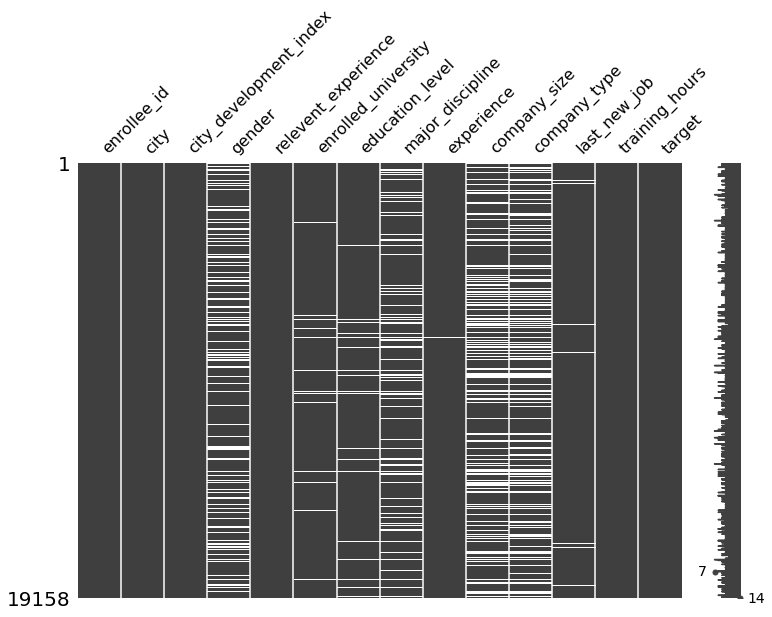

In [9]:
!pip install missingno
import missingno
missingno.matrix(df,figsize=(12,8))

gendre, education_level, enrolled_university, major_discipline, company_size, company_type, last_new_job missing values replace with mode as categorical column

experience column missing values replace with mean as numerical

In [138]:
gender_mode = df.loc[:,"gender"].mode()
df['gender'].fillna(gender_mode[0], inplace=True)

In [139]:
education_level_mode = df.loc[:,"education_level"].mode()
df['education_level'].fillna(education_level_mode[0], inplace=True)

In [140]:
enrolled_university_mode = df.loc[:,"enrolled_university"].mode()
df['enrolled_university'].fillna(enrolled_university_mode[0], inplace=True)

In [141]:
major_discipline_mode = df.loc[:,"major_discipline"].mode()
df['major_discipline'].fillna(major_discipline_mode[0], inplace=True)

In [142]:
company_size_mode = df.loc[:,"company_size"].mode()
df['company_size'].fillna(company_size_mode[0], inplace=True)

In [143]:
company_type_mode = df.loc[:,"company_type"].mode()
df['company_type'].fillna(company_type_mode[0], inplace=True)

In [144]:
last_new_job_mode = df.loc[:,"last_new_job"].mode()
df['last_new_job'].fillna(last_new_job_mode[0], inplace=True)

In [145]:
#replace >20 and < 1 with 21 and 0 for making Numeric for corelation
df["experience"] = df["experience"].apply(lambda x: '21' if (x=='>20') else('0' if (x=='<1') else x))
df["experience"]

0        21
1        15
2         5
3         0
4        21
         ..
19153    14
19154    14
19155    21
19156     0
19157     2
Name: experience, Length: 19158, dtype: object

In [146]:
df["experience"].unique()

array(['21', '15', '5', '0', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [147]:
s = pd.Series(df["experience"])
s.isnull().values.sum()

65

In [148]:
experience_mean = df["experience"].mode()
df['experience'].fillna(experience_mean[0], inplace=True)

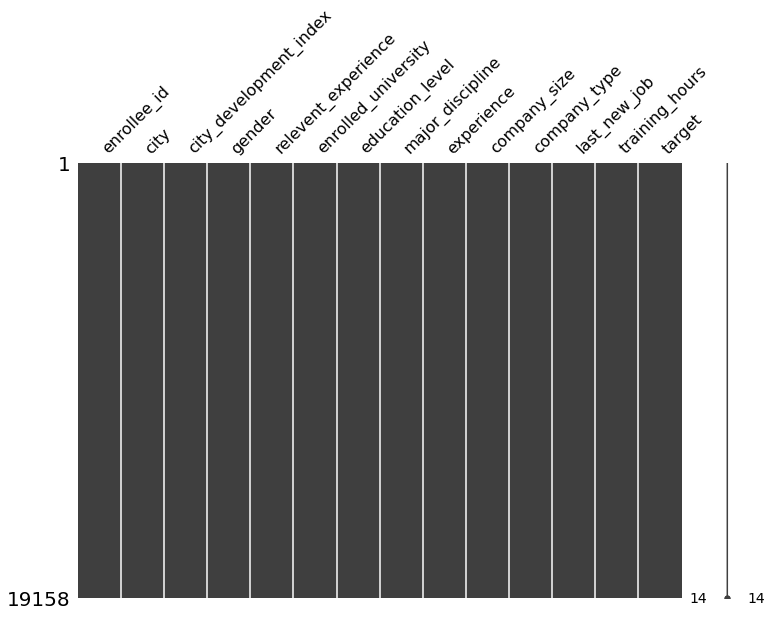

In [149]:
!pip install missingno
import missingno
missingno.matrix(df,figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

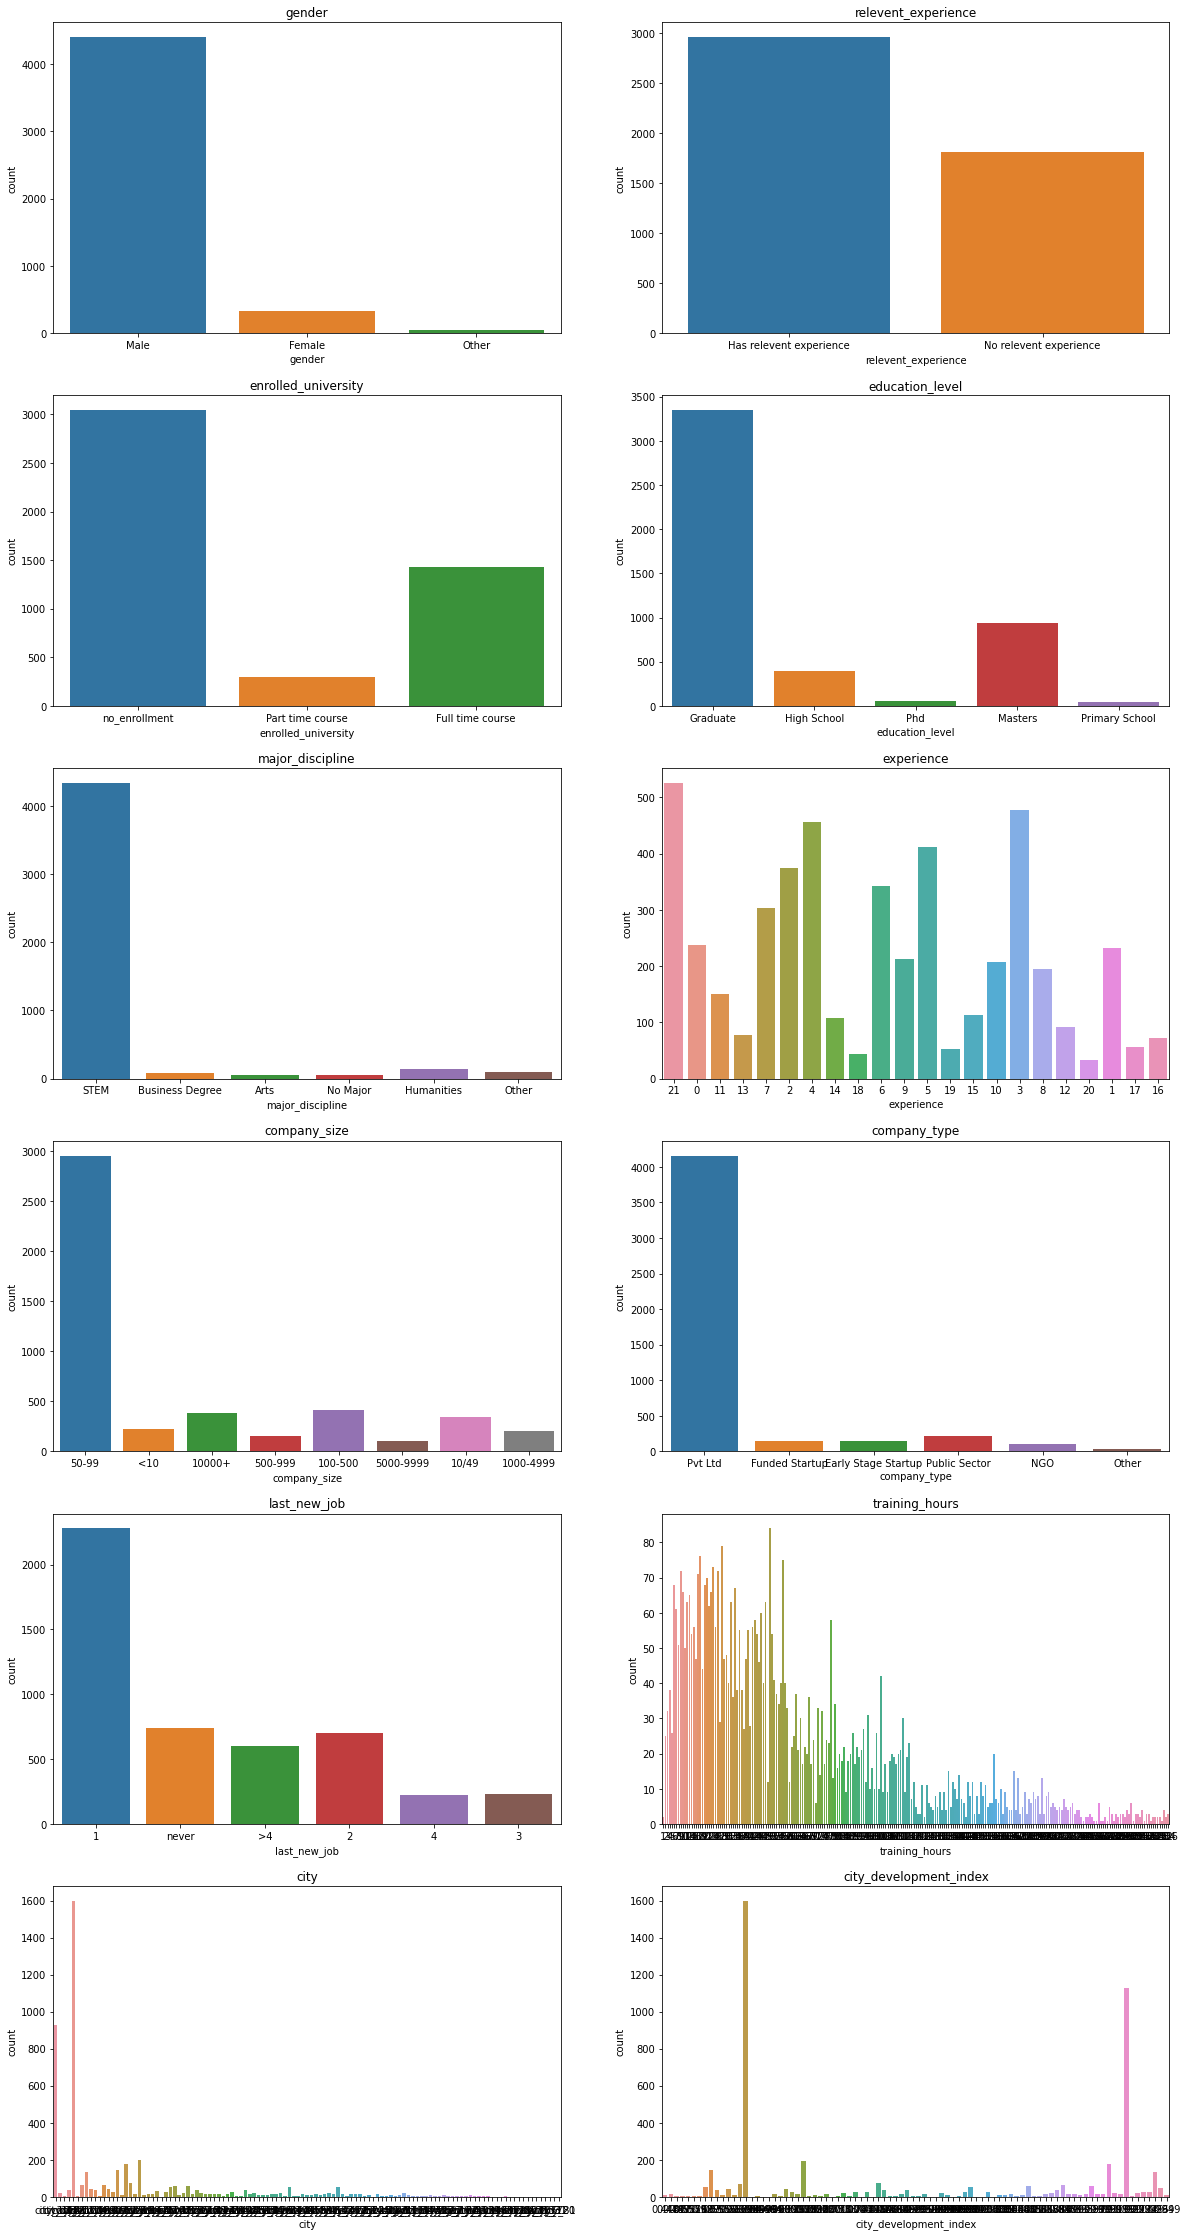

In [126]:
n_rows=6
n_cols=2
width=20
height=40

fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
#Data normalisation view
wk = df[df["target"]==1]

#gender
g = sns.countplot(wk["gender"], ax=ax[0,0])
ax[0,0].set_title("gender")

#relevent_experience
g = sns.countplot(wk["relevent_experience"], ax=ax[0,1])
ax[0,1].set_title("relevent_experience")
#enrolled_university
g = sns.countplot(wk["enrolled_university"], ax=ax[1,0])
ax[1,0].set_title("enrolled_university")
#education_level
g = sns.countplot(wk["education_level"], ax=ax[1,1])
ax[1,1].set_title("education_level")
#major_discipline
g = sns.countplot(wk["major_discipline"], ax=ax[2,0])
ax[2,0].set_title("major_discipline")
#experience
g = sns.countplot(wk["experience"], ax=ax[2,1])
ax[2,1].set_title("experience")
#company_size
g = sns.countplot(wk["company_size"], ax=ax[3,0])
ax[3,0].set_title("company_size")
#company_type
g = sns.countplot(wk["company_type"], ax=ax[3,1])
ax[3,1].set_title("company_type")
#last_new_job
g = sns.countplot(wk["last_new_job"], ax=ax[4,0])
ax[4,0].set_title("last_new_job")
#training_hours
g = sns.countplot(wk["training_hours"], ax=ax[4,1])
ax[4,1].set_title("training_hours")
#city
g = sns.countplot(wk["city"], ax=ax[5,0])
ax[5,0].set_title("city")
#city_development_index
g = sns.countplot(wk["city_development_index"], ax=ax[5,1])
ax[5,1].set_title("city_development_index")

plt.show()

Data visualization is needed for normalisation and standardization

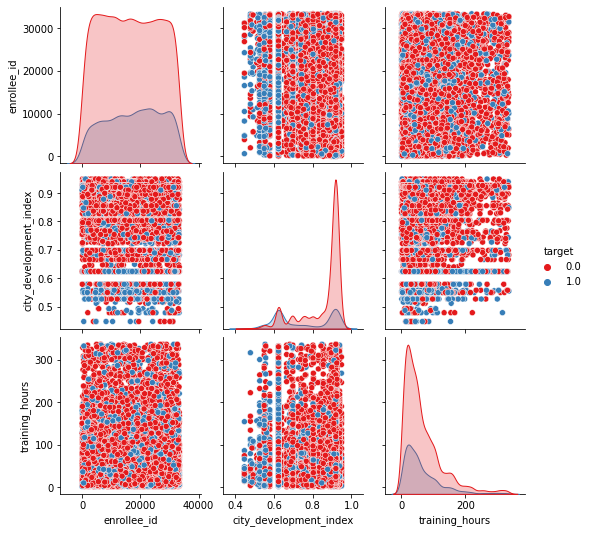

In [59]:
sns.pairplot(df,hue='target',palette='Set1')

Exploratory data analysis

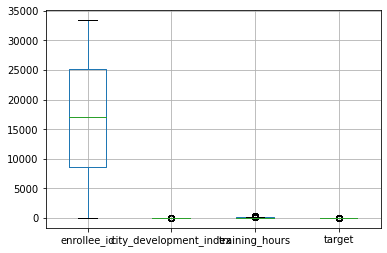

In [150]:
df.boxplot()

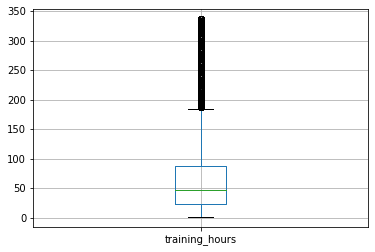

In [151]:
df.boxplot(column=['training_hours'])

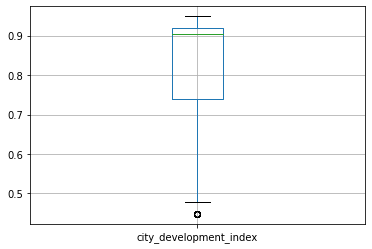

In [152]:
df.boxplot(column=['city_development_index'])

In [153]:
outl = df[df["city_development_index"]<0.5]
print(outl["city_development_index"].count())
outl

63


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
695,20911,city_48,0.493,Male,No relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,1,33,1.0
807,9337,city_126,0.479,Male,Has relevent experience,Full time course,Graduate,STEM,5,50-99,Public Sector,1,4,0.0
943,1973,city_126,0.479,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,10000+,Public Sector,1,22,0.0
945,32820,city_126,0.479,Female,No relevent experience,Part time course,Masters,STEM,9,50-99,Pvt Ltd,1,99,1.0
977,28531,city_126,0.479,Male,No relevent experience,Full time course,Masters,Other,1,10/49,Other,1,23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17235,5741,city_48,0.493,Male,No relevent experience,no_enrollment,Graduate,STEM,4,50-99,Pvt Ltd,2,18,0.0
17701,24256,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,4,10/49,Public Sector,1,44,1.0
18065,16548,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,0,1000-4999,Public Sector,1,15,1.0
18092,30765,city_139,0.487,Female,Has relevent experience,no_enrollment,Masters,No Major,0,50-99,Pvt Ltd,never,12,1.0


outlier treatment. Replace with 3 Sigma method. i.e. Mean +- 3* standard deviation

In [154]:
mean = df["city_development_index"].mean()
sd = df["city_development_index"].std()
leftVal = mean - 3*sd
rightVal = mean + 3*sd
print(mean, sd, leftVal,rightVal)
outlL = df[df["city_development_index"]<leftVal]
outlR = df[df["city_development_index"]> rightVal]
print(outlL["city_development_index"].count(), outlR["city_development_index"].count())
outlL

0.8288480008351684 0.12336175686055084 0.4587627302535159 1.1989332714168208
17 0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,city_33,0.448,Male,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,never,43,1.0
5010,27970,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,never,73,1.0
5265,31194,city_33,0.448,Male,No relevent experience,no_enrollment,High School,STEM,5,50-99,Pvt Ltd,never,86,1.0
5567,598,city_33,0.448,Male,Has relevent experience,Part time course,Masters,STEM,6,50-99,Pvt Ltd,1,18,1.0
6127,18564,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,4,50-99,Public Sector,4,32,1.0
7724,31179,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,>4,74,0.0
9134,4858,city_33,0.448,Male,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


In [155]:
df.loc[df["city_development_index"] < leftVal, "city_development_index"] = leftVal

In [156]:
df[df["city_development_index"]<leftVal]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


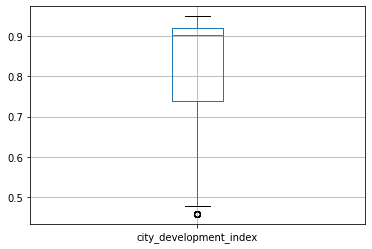

In [157]:
df.boxplot(column=['city_development_index'])

identify column type and replace categorical columns

In [158]:
df.head(10)
#Encoding (categorical to Numerical)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#target column
target_col=['target']

#categorical cols
categorical_cols=df.nunique()[df.nunique() < 9].keys().tolist()
categorical_cols=[x for x in categorical_cols if x not in target_col]
print("categorical columns: {}".format(categorical_cols))

#numerical cols
cont_cols=[x for x in df.columns if x not in categorical_cols+target_col]
print("Numerical columns: {}".format(cont_cols))

categorical columns: ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']
Numerical columns: ['enrollee_id', 'city', 'city_development_index', 'experience', 'training_hours']


In [159]:
#Label Encoding for Binary cols
le=LabelEncoder()
for i in categorical_cols:
    df[i]=le.fit_transform(df[i])
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,city_40,0.776,1,1,2,0,5,15,4,5,4,47,0.0
2,11561,city_21,0.624,1,1,0,0,5,5,4,5,5,83,0.0
3,33241,city_115,0.789,1,1,2,0,1,0,4,5,5,52,1.0
4,666,city_162,0.767,1,0,2,2,5,21,4,1,3,8,0.0
5,21651,city_176,0.764,1,0,1,0,5,11,4,5,0,24,1.0
6,28806,city_160,0.920,1,0,2,1,5,5,4,1,0,24,0.0
7,402,city_46,0.762,1,0,2,0,5,13,7,5,4,18,1.0
8,27107,city_103,0.920,1,0,2,0,5,7,4,5,0,46,1.0
9,699,city_103,0.920,1,0,2,0,5,17,3,5,4,123,0.0


Feature Selection

In [176]:
from google.colab import files
df.to_csv(r"churnFinal.csv", sep=',', index=False)
files.download('churnFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Coorelation

mostly categorical data. so will be using spearman  correlation 

Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

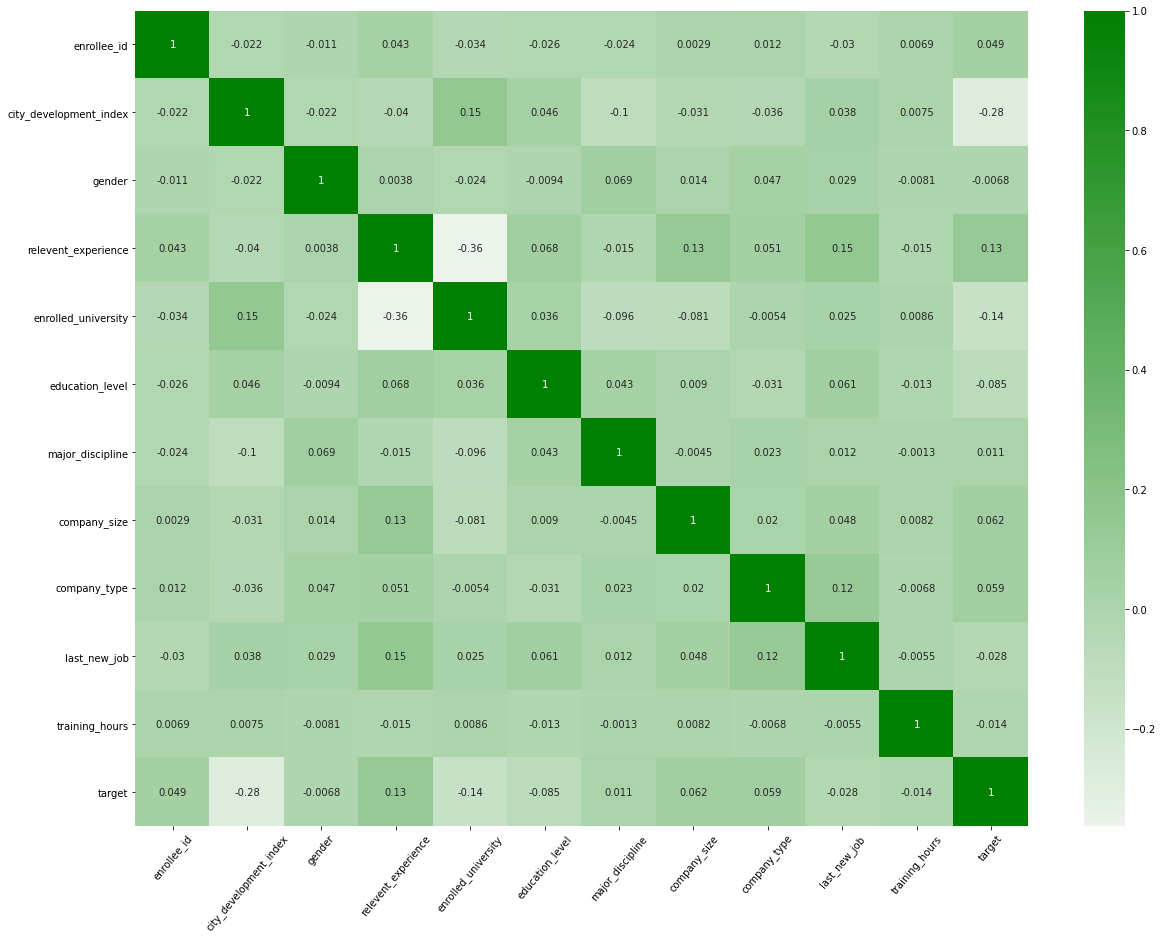

In [202]:
#Co-relation 
#correlation analysis shows us how to determine both the nature and strength of relationship between two variables
#correaltion lies between -1 to 1 (0: No corelation; -1: perfect negative correlation; +1: positive core)
correlation=df.corr(method='spearman')
correlation

#plotting correlation Matrix
plt.figure(figsize=(20,15))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, cmap=cm, annot=True)
plt.xticks(rotation=50)

corelation coefficient is higher for relevant_experience and enrolled_university. So treatment is needed

Chi Suare

Chi-Square test is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data. The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them

Chi square is very relevant since we have most of the column categorical data

In [191]:
chiData = df.drop(labels='city', axis=1)
chiData

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,0.776,1,1,2,0,5,15,4,5,4,47,0.0
2,11561,0.624,1,1,0,0,5,5,4,5,5,83,0.0
3,33241,0.789,1,1,2,0,1,0,4,5,5,52,1.0
4,666,0.767,1,0,2,2,5,21,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1,1,2,0,2,14,4,5,0,42,1.0
19154,31398,0.920,1,0,2,0,5,14,4,5,3,52,1.0
19155,24576,0.920,1,0,2,0,5,21,4,5,3,44,0.0
19156,5756,0.802,1,0,2,1,5,0,5,5,1,97,0.0


In [177]:
chiData.to_csv(r"chiData.csv", sep=',', index=False)
files.download('chiData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. H0 (Null Hypothesis) = The 2 variables to be compared are independent.
2. H1 (Alternate Hypothesis) = The 2 variables are dependent.

if the p-value obtained after conducting the test is less than 0.05 we reject the Null hypothesis and accept the Alternate hypothesis and if the p-value is greater that 0.05 we accept the Null hypothesis and reject the Alternate hypothesis

degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as

degrees of freedom: (rows - 1) * (cols - 1)

In [195]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
chiDataNew = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/JobChurnInIt/main/chiData.csv')

In [196]:
chisquare(chiDataNew)

Power_divergenceResult(statistic=array([1.04975956e+08, 3.51563650e+02, 1.45108349e+03, 1.37920000e+04,
       7.93672355e+03, 2.75519413e+04, 3.67228139e+03, 8.72589579e+04,
       1.81641900e+04, 7.17830000e+03, 4.11022897e+04, 1.05710480e+06,
       1.43810000e+04]), pvalue=array([0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.99999988, 1.        ,
       0.        , 0.        , 1.        ]))

In [197]:
stat, p, dof, expected = chi2_contingency(chiDataNew)
print('p=', p)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

p= 0.0
dof=229884
[[8.97474132e+03 4.40807361e-01 5.02760561e-01 ... 9.28709323e-01
  3.47637650e+01 1.32609309e-01]
 [2.96440332e+04 1.45600944e+00 1.66064405e+00 ... 3.06757477e+00
  1.14826508e+02 4.38015384e-01]
 [1.16057352e+04 5.70032418e-01 6.50147532e-01 ... 1.20096547e+00
  4.49549503e+01 1.71484444e-01]
 ...
 [2.45247994e+04 1.20457089e+00 1.37386711e+00 ... 2.53783469e+00
  9.49970959e+01 3.62374423e-01]
 [5.84114358e+03 2.86896190e-01 3.27217968e-01 ... 6.04443550e-01
  2.26257376e+01 8.63077817e-02]
 [2.38524933e+04 1.17154960e+00 1.33620485e+00 ... 2.46826422e+00
  9.23929105e+01 3.52440538e-01]]
probability=0.950, critical=231000.449, stat=6321061.344
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

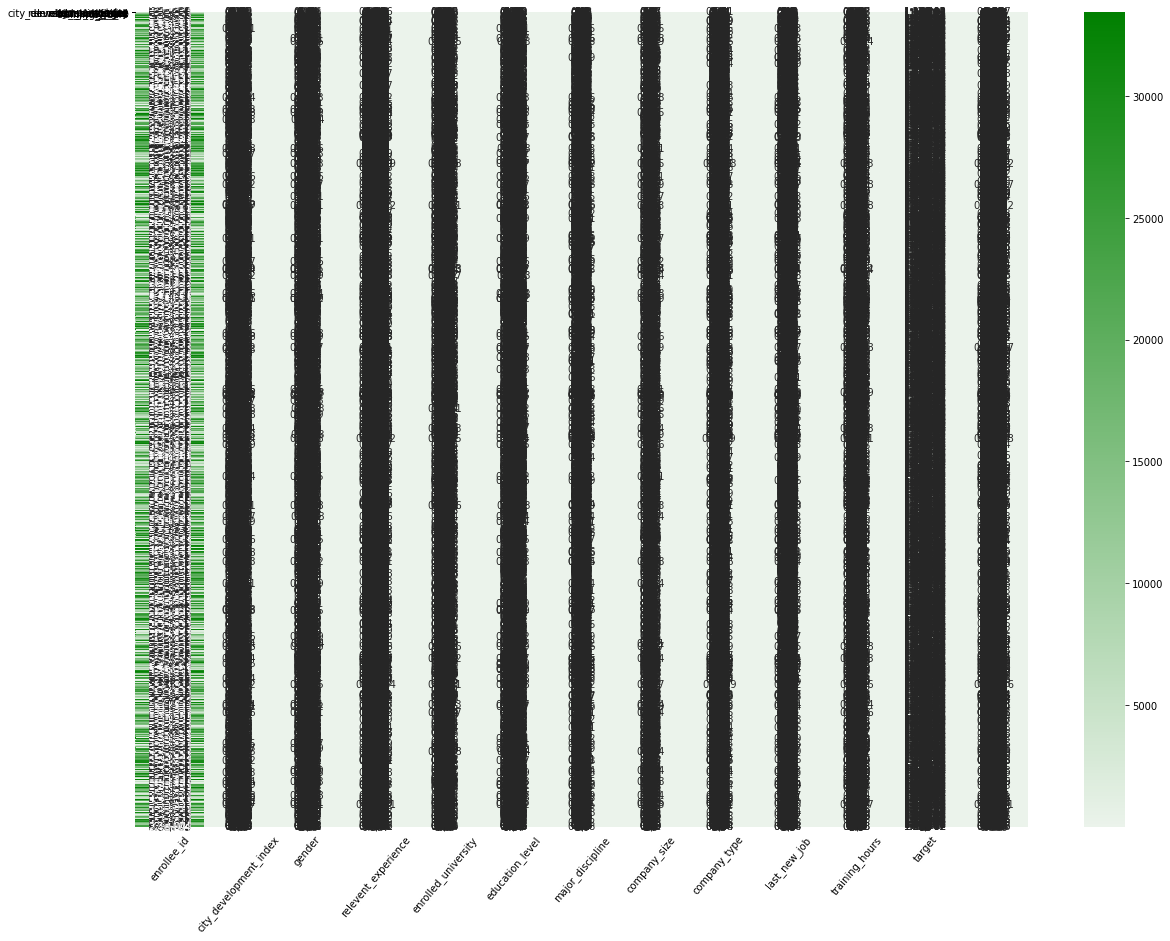

In [199]:
#plotting correlation Matrix
plt.figure(figsize=(20,15))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(expected, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, cmap=cm, annot=True)
plt.xticks(rotation=50)

In [204]:
x=df.drop(labels=['target','enrollee_id','city'],axis=1)
y=df['target']
#'enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
#'major_discipline', 'experience', 'company_size', 'company_type','last_new_job', 'training_hours', 'target'

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

Machine Learning models

We have 7 in general common classification techniques
1. Logistic Regression
2. Naïve Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbours
5. Decision Tree
6. Random Forest
7. Support Vector Machine

Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [206]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [207]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
prediction=dtree.predict(x_test)

In [209]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[3671 1070]
 [ 865  717]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      4741
         1.0       0.40      0.45      0.43      1582

    accuracy                           0.69      6323
   macro avg       0.61      0.61      0.61      6323
weighted avg       0.71      0.69      0.70      6323



Logistic regression: Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable

In [212]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [213]:
logreg = LogisticRegression()

In [214]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
y_pred = logreg.predict(x_test)

In [216]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [217]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[4607  134]
 [1366  216]]
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      4741
         1.0       0.62      0.14      0.22      1582

    accuracy                           0.76      6323
   macro avg       0.69      0.55      0.54      6323
weighted avg       0.73      0.76      0.70      6323

